# Part 1:
# EDA and Feature Engineering[40 marks]

In [194]:
import csv
import random
import math
import numpy as np
import pandas as pd
import seaborn as sns

In [195]:
#MaterialStrength_testing is the data given by sir to predict by running the best model 
MaterialStrength_testing = pd.read_csv('https://raw.githubusercontent.com/gagan-iitb/CS550/main/Labs_M23/MaterialStrength_test.csv')
MaterialStrength_testing.shape

(230, 9)

In [196]:
#here we read the dataset directly from github link provided by the sir which we are using for trainig and validation
url = 'https://raw.githubusercontent.com/gagan-iitb/CS550/main/Labs_M23/MaterialStrength_Train.csv'
#converted the datatype of age from int to float64 to avoid future concequences
Material_strength = pd.read_csv(url, dtype={'age' : 'float64'})
print(Material_strength.columns)
Material_strength.shape

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age', 'Material Strength'],
      dtype='object')


(800, 9)

In [197]:
Material_strength

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0,44.30
...,...,...,...,...,...,...,...,...,...
795,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,180.0,61.92
796,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,90.0,47.22
797,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,180.0,51.04
798,500.0,0.0,0.0,200.0,0.0,1125.0,613.0,270.0,55.16


In [198]:
Material_strength.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              800 non-null    float64
 1   blast_furnace_slag  800 non-null    float64
 2   fly_ash             800 non-null    float64
 3   water               800 non-null    float64
 4   superplasticizer    800 non-null    float64
 5   coarse_aggregate    800 non-null    float64
 6   fine_aggregate      800 non-null    float64
 7   age                 800 non-null    float64
 8   Material Strength   800 non-null    float64
dtypes: float64(9)
memory usage: 56.4 KB


In [199]:
Material_strength.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
count,800.000000,800.000000,800.00000,800.00000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,292.533625,67.819125,47.81125,179.77925,5.693500,985.551875,778.426250,49.69625,36.654187
std,103.719988,86.017377,61.53907,22.18845,6.264438,72.783248,82.670454,69.13960,17.623053
min,102.000000,0.000000,0.00000,121.80000,0.000000,801.000000,594.000000,1.00000,2.330000
25%,212.100000,0.000000,0.00000,162.00000,0.000000,938.000000,746.600000,7.00000,23.242500
50%,277.050000,19.000000,0.00000,184.00000,5.250000,974.000000,780.650000,28.00000,35.340000
75%,374.000000,129.800000,117.50000,192.00000,10.200000,1046.925000,839.525000,56.00000,48.880000
max,540.000000,359.400000,174.70000,228.00000,32.200000,1145.000000,992.600000,365.00000,82.600000


In [200]:
#here we are considering z score into account
#By calculating the Z-score for each data point, you can set a threshold 
#(e.g., ±2 or ±3 standard deviations) beyond which data points are considered outliers. 
#This can help you detect potentially erroneous or interesting observations. 

Material_strength_z = Material_strength[(np.abs(Material_strength - Material_strength.mean()) / Material_strength.std()) <= 3].dropna()
Material_strength_z.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,Material Strength
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,288.675497,66.282781,50.660927,178.820662,5.632848,988.536821,781.544901,38.631788,36.048954
std,101.779091,84.338891,62.197399,20.852236,5.662043,72.257284,79.586653,40.786590,17.738385
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,212.000000,0.000000,0.000000,162.000000,0.000000,942.000000,747.650000,7.000000,22.515000
50%,275.100000,17.600000,0.000000,181.700000,5.500000,978.000000,780.700000,28.000000,34.290000
75%,362.600000,129.800000,118.300000,192.000000,10.200000,1047.000000,839.200000,56.000000,47.895000
max,540.000000,316.100000,174.700000,228.000000,23.400000,1145.000000,992.600000,180.000000,82.600000


As here we see 45 datapoints are dropped due to z score which if in dataset may lead to wrong distraction of the model

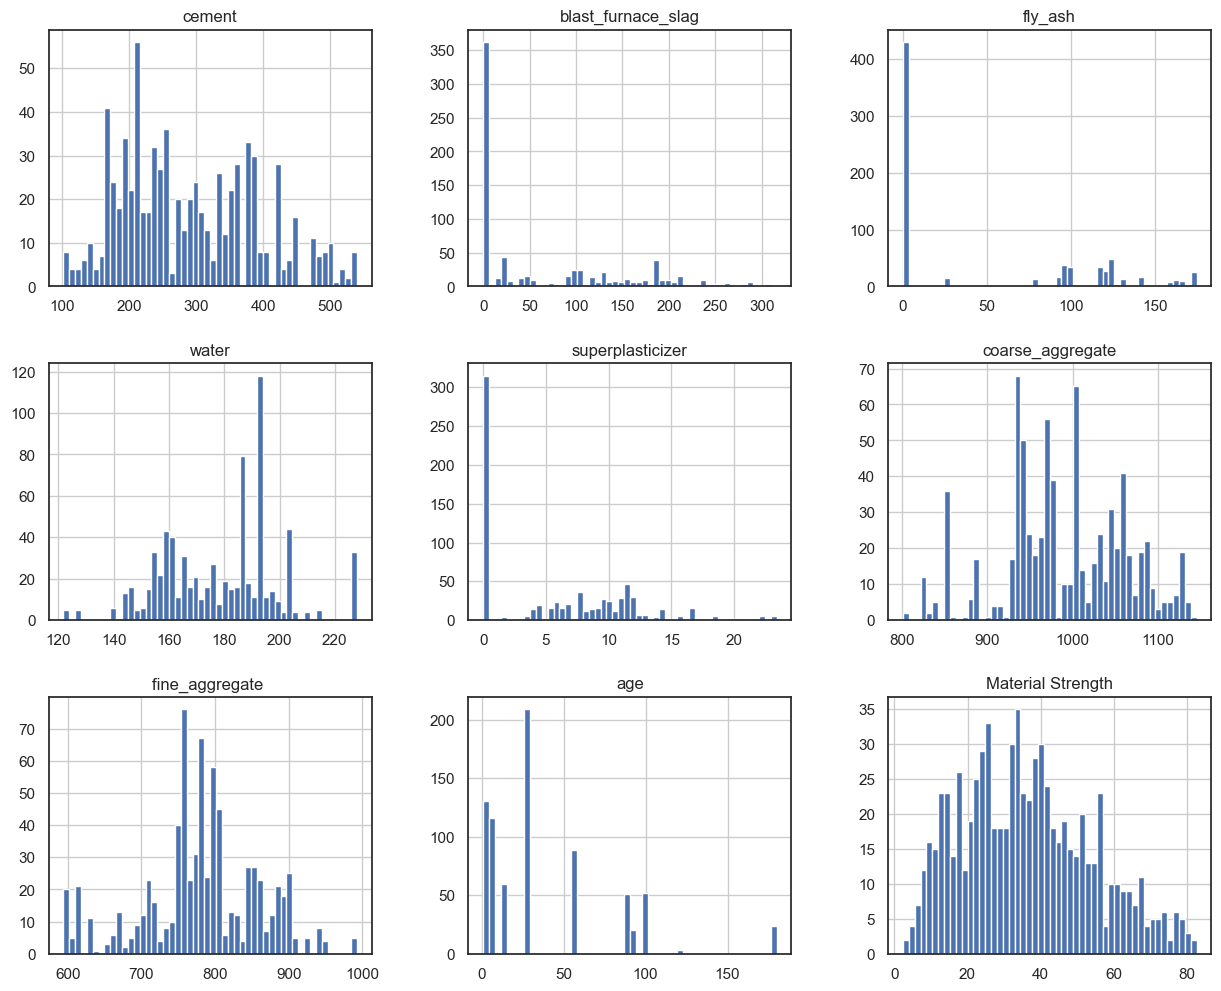

In [201]:
#This is to get an overview of the data distribution
from matplotlib import pyplot as plt
Material_strength_z.hist(bins=50, figsize=(15,12))
plt.show()

In [202]:
#We find this correlation matrix to find the factors closely related to Material Strength feature so that 
#which can be userful to create new features and remove ones with low correlation
corr_matrix = Material_strength_z.corr()
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength     1.000000
superplasticizer      0.497769
age                   0.462120
cement                0.459961
blast_furnace_slag    0.141024
fly_ash               0.011436
fine_aggregate       -0.186574
coarse_aggregate     -0.196641
water                -0.345137
Name: Material Strength, dtype: float64

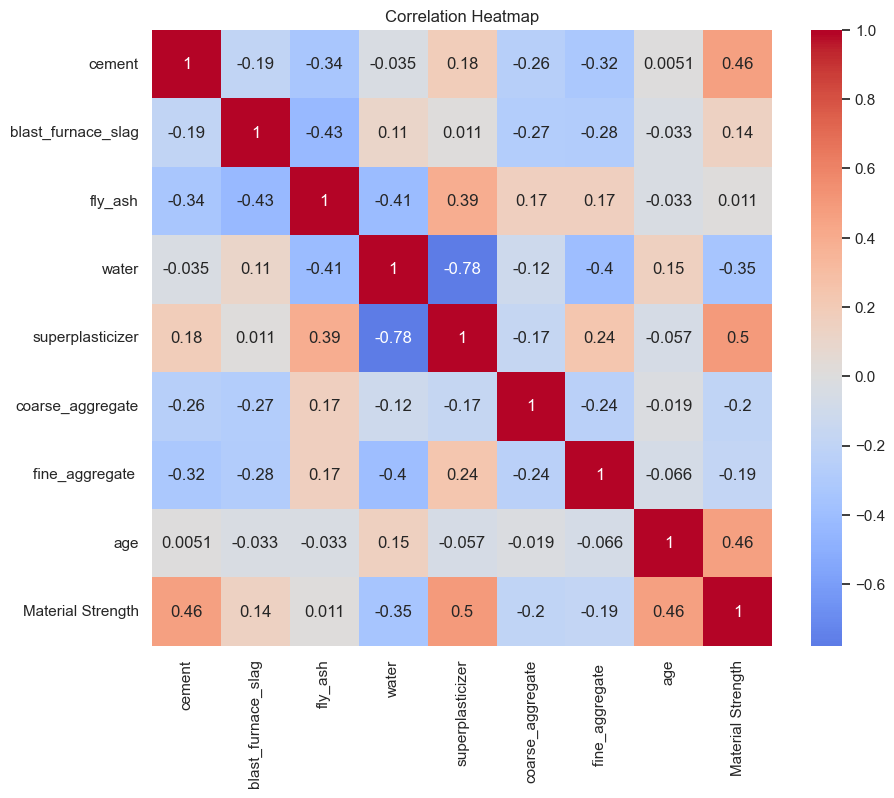

In [203]:
#This heat map is to have correlation between every feature so that we can eleminate features with high correlation.
# Set the style of the visualization
sns.set(style="white")

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)  # Annotate cells and choose a colormap
plt.title("Correlation Heatmap")
plt.show()

In [204]:
# i have performed various manupulations like log, squareroot, square and also added new features
Material_strength_newfe = Material_strength_z.copy()
Material_strength_newfe['total_binders_content'] = Material_strength_newfe['cement'] + Material_strength_newfe['fly_ash'] + Material_strength_newfe['blast_furnace_slag']
Material_strength_newfe['aggregate_content'] = Material_strength_newfe['fine_aggregate '] + Material_strength_newfe['coarse_aggregate']
Material_strength_newfe['total_solid_content'] = Material_strength_newfe['total_binders_content'] + Material_strength_newfe['aggregate_content']
Material_strength_newfe['binder_to_aggregate_ratio'] = Material_strength_newfe['total_binders_content'] / Material_strength_newfe['aggregate_content']
for i in Material_strength_newfe.columns:
    if i != 'Material Strength' :
        Material_strength_newfe[f'{i}_log'] = np.log1p(Material_strength_newfe[i])
        Material_strength_newfe[f'{i}_sqrt'] = np.sqrt(Material_strength_newfe[i])
        Material_strength_newfe[f'{i}_sqr'] = np.square(Material_strength_newfe[i])
MaterialStrength_testing['total_binders_content'] = MaterialStrength_testing['cement'] + MaterialStrength_testing['fly_ash'] + MaterialStrength_testing['blast_furnace_slag']
MaterialStrength_testing['aggregate_content'] = MaterialStrength_testing['fine_aggregate '] + MaterialStrength_testing['coarse_aggregate']
MaterialStrength_testing['total_solid_content'] = MaterialStrength_testing['total_binders_content'] + MaterialStrength_testing['aggregate_content']
MaterialStrength_testing['binder_to_aggregate_ratio'] = MaterialStrength_testing['total_binders_content'] / MaterialStrength_testing['aggregate_content']
for i in MaterialStrength_testing.columns:
    if i != 'Material Strength' :
        MaterialStrength_testing[f'{i}_log'] = np.log1p(MaterialStrength_testing[i])
        MaterialStrength_testing[f'{i}_sqrt'] = np.sqrt(MaterialStrength_testing[i])
        MaterialStrength_testing[f'{i}_sqr'] = np.square(MaterialStrength_testing[i])

In [205]:
Material_strength_newfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 799
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   cement                          755 non-null    float64
 1   blast_furnace_slag              755 non-null    float64
 2   fly_ash                         755 non-null    float64
 3   water                           755 non-null    float64
 4   superplasticizer                755 non-null    float64
 5   coarse_aggregate                755 non-null    float64
 6   fine_aggregate                  755 non-null    float64
 7   age                             755 non-null    float64
 8   Material Strength               755 non-null    float64
 9   total_binders_content           755 non-null    float64
 10  aggregate_content               755 non-null    float64
 11  total_solid_content             755 non-null    float64
 12  binder_to_aggregate_ratio       755 

In [206]:
#to find the correlations to find the best manupulation of each feature
corr_matrix = Material_strength_newfe.corr()
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength                 1.000000
age_log                           0.619212
total_binders_content_sqrt        0.617767
total_binders_content_log         0.616986
total_binders_content             0.616042
total_binders_content_sqr         0.606545
binder_to_aggregate_ratio_sqrt    0.583853
binder_to_aggregate_ratio_log     0.580807
binder_to_aggregate_ratio         0.578227
age_sqrt                          0.562188
binder_to_aggregate_ratio_sqr     0.558847
superplasticizer                  0.497769
superplasticizer_sqrt             0.478726
superplasticizer_log              0.468317
age                               0.462120
cement                            0.459961
cement_sqrt                       0.457887
cement_sqr                        0.454066
cement_log                        0.451924
superplasticizer_sqr              0.451462
total_solid_content_sqr           0.427999
total_solid_content               0.420539
total_solid_content_sqrt          0.416668
total_solid

In [207]:
# i have dropped all fly_ash features due to too less correlation and included various features depending on 
# their correlation with the Material Strength feature
columns = ['total_binders_content_sqrt','age_log','binder_to_aggregate_ratio_sqrt','cement','superplasticizer','total_solid_content_sqr',
          'blast_furnace_slag_log','fine_aggregate _log','coarse_aggregate_log','water_log','aggregate_content_sqr','Material Strength']

Material_strength_new=Material_strength_newfe[columns]
columns_ = ['total_binders_content_sqrt','age_log','binder_to_aggregate_ratio_sqrt','cement','superplasticizer','total_solid_content_sqr',
          'blast_furnace_slag_log','fine_aggregate _log','coarse_aggregate_log','water_log','aggregate_content_sqr']

MaterialStrength_testing = MaterialStrength_testing[columns_]
corr_matrix = Material_strength_new.corr()
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength                 1.000000
age_log                           0.619212
total_binders_content_sqrt        0.617767
binder_to_aggregate_ratio_sqrt    0.583853
superplasticizer                  0.497769
cement                            0.459961
total_solid_content_sqr           0.427999
blast_furnace_slag_log            0.218748
fine_aggregate _log              -0.189973
coarse_aggregate_log             -0.202640
aggregate_content_sqr            -0.311399
water_log                        -0.355520
Name: Material Strength, dtype: float64

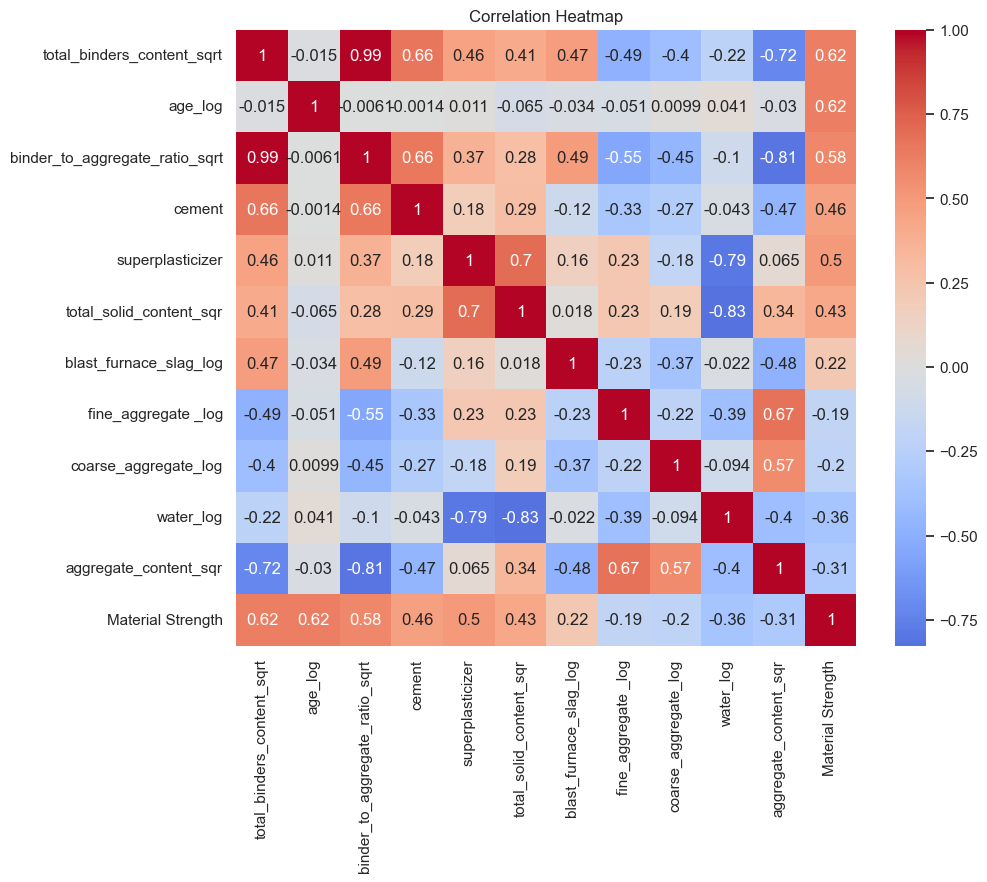

In [208]:
# Set the style of the visualization
sns.set(style="white")

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)  # Annotate cells and choose a colormap
plt.title("Correlation Heatmap")
plt.show()

By seeeing the correlation heat map , binder_to_aggregate_ratio_sqrt and total_binders_content is 0.99 correlated so i am neglecting the feature with correlation with Material Strength. 
That is : binder_to_aggregate_ratio_sqrt

In [209]:
#used drop to drop 'binder_to_aggregate_ratio_sqrt' feature as explained below 
Material_strength_new=Material_strength_new.drop("binder_to_aggregate_ratio_sqrt", axis=1)
MaterialStrength_testing = MaterialStrength_testing.drop("binder_to_aggregate_ratio_sqrt", axis=1)

In [210]:
Material_strength_new.describe()

,total_binders_content_sqrt,age_log,cement,superplasticizer,total_solid_content_sqr,blast_furnace_slag_log,fine_aggregate _log,coarse_aggregate_log,water_log,aggregate_content_sqr,Material Strength
count,755.000000,755.000000,755.000000,755.000000,7.550000e+02,755.000000,755.000000,755.000000,755.000000,7.550000e+02,755.000000
mean,20.000025,3.108795,288.675497,5.632848,4.738880e+06,2.385416,6.657195,6.894533,5.185160,3.142027e+06,36.048954
std,2.371850,1.145934,101.779091,5.662043,3.115936e+05,2.370731,0.104665,0.073902,0.117258,3.269379e+05,17.738385
min,14.142136,0.693147,102.000000,0.000000,3.928324e+06,0.000000,6.388561,6.687109,4.810557,2.313441e+06,2.330000
25%,18.267457,2.079442,212.000000,0.000000,4.533067e+06,0.000000,6.618271,6.849066,5.093750,2.964251e+06,22.515000
50%,19.544820,3.367296,275.100000,5.500000,4.760251e+06,2.923162,6.661471,6.886532,5.207845,3.188724e+06,34.290000
75%,22.055605,4.043051,362.600000,10.200000,4.949958e+06,4.873669,6.733640,6.954639,5.262690,3.380818e+06,47.895000
max,25.298221,5.198497,540.000000,23.400000,5.784025e+06,5.759217,6.901335,7.044033,5.433722,3.880900e+06,82.600000


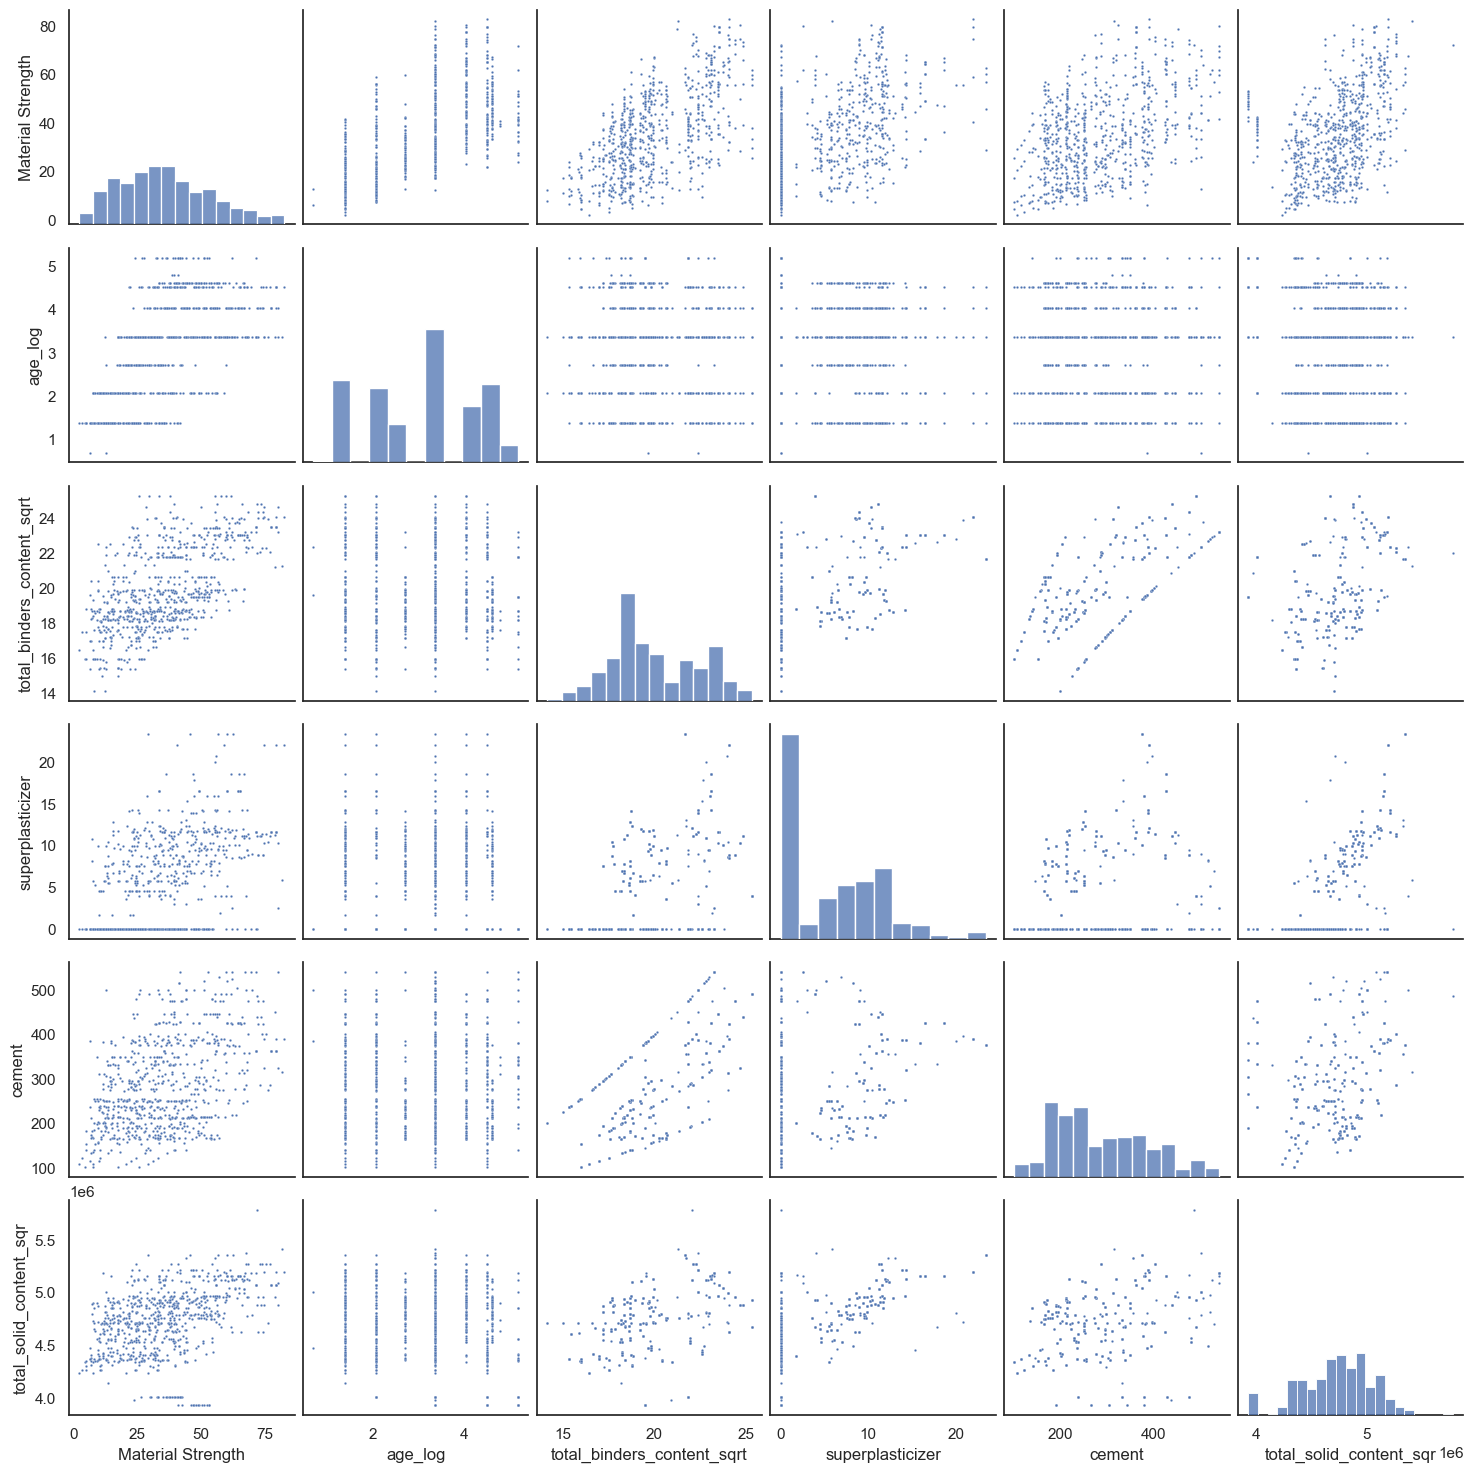

In [211]:
attributes = ["Material Strength", "age_log", "total_binders_content_sqrt", "superplasticizer","cement","total_solid_content_sqr"]
sns.pairplot(Material_strength_new[attributes], plot_kws={"s": 3})
plt.show()

In [212]:
# to confirm feature transformation didn't hinder the dimentions 
print(Material_strength_new.shape)
print(MaterialStrength_testing.shape)

(755, 11)
(230, 10)


In [213]:
# to ensure all the correlation factors are decent
corr_matrix = Material_strength_new.corr()
corr_matrix["Material Strength"].sort_values(ascending=False)

Material Strength             1.000000
age_log                       0.619212
total_binders_content_sqrt    0.617767
superplasticizer              0.497769
cement                        0.459961
total_solid_content_sqr       0.427999
blast_furnace_slag_log        0.218748
fine_aggregate _log          -0.189973
coarse_aggregate_log         -0.202640
aggregate_content_sqr        -0.311399
water_log                    -0.355520
Name: Material Strength, dtype: float64

In [214]:
# diving the given data into training and testing data with labels
from sklearn.model_selection import train_test_split
Data_new_fe=Material_strength_new.drop(["Material Strength"], axis = 1)
Data_new_pr=Material_strength_new["Material Strength"]
Data_new_fe_OLS=Material_strength.drop(["Material Strength"], axis = 1)
Data_new_pr_OLS=Material_strength["Material Strength"]
trainx_,testx_,trainy_,testy_ = train_test_split(Data_new_fe, Data_new_pr, test_size=0.2, shuffle = True, random_state=0)

In [215]:
# for our understanding 
print("trainx_ :"+str(trainx_.shape))
print("trainy_ :"+str(trainy_.shape))
print("testx_ :"+str(testx_.shape))
print("testy_ :"+str(testy_.shape))

trainx_ :(604, 10)
trainy_ :(604,)
testx_ :(151, 10)
testy_ :(151,)


In [216]:
testx_ = np.c_[np.ones(testx_.shape[0]),testx_]
trainx_ = np.c_[np.ones(trainx_.shape[0]),trainx_]

# Part 2: Exact Solution;
# Normal equation and psudoinverse[30 marks]

In [217]:
# Normal Equation
def NormalEq(X,Y):
    x_tp = np.transpose(X)
    w = np.linalg.solve(np.dot(x_tp,X),np.dot(x_tp,Y))
#     w = np.dot((np.linalg.inv(np.dot(x_tp,X))), np.dot(x_tp,Y))
    return w

In [218]:
def predict(X_test, w):
    return np.dot(X_test, w)

In [219]:
w_normal = NormalEq(trainx_,trainy_)
print(w_normal)

[-7.83341819e+02 -7.14086700e-01  9.83058896e+00  3.66402260e-02
  3.70361558e-01  1.99046733e-05  5.41522505e-01  6.21864832e+01
  8.71090224e+01 -3.20187252e+01 -4.88664472e-05]


In [220]:
Predicted_y = predict(testx_,w_normal)
print(Predicted_y[:5])

[28.35853675  6.51956348 34.48065471 45.99999131 35.84963731]


In [221]:
# Prediction through normal equation approach

#Evaluvation: Mean Square Error
mse = np.sum((Predicted_y - testy_)**2)/ testx_.shape[0]

# R_square 
sse = np.sum((Predicted_y - testy_)**2)
sst = np.sum((testy_ - testy_.mean())**2)
R_square = (1 - (sse/sst))
print('The Mean Square Error: ',mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error:  37.82388721490954
R square obtain for normal equation method is : 0.8414601077460095


In [222]:
# Psuedo inverse meathod w_pinv is the weights obtained by psudoinverse meathod 
x_tp = np.transpose(trainx_)
xt_x = np.dot(x_tp,trainx_)
xt_y = np.dot(x_tp,trainy_)
p = np.linalg.pinv(xt_x)
w_pinv = np.dot(p, xt_y)
print(w_pinv)

[-1.59534960e-01 -2.56352862e+00  9.73194972e+00  2.71262833e-02
  6.05286185e-01  3.78118000e-05  4.18906348e-01 -9.97412106e-01
 -1.00773576e+00 -9.90902831e-01 -3.67137937e-05]


In [223]:
Predicted_y = predict(testx_,w_pinv)
print(Predicted_y[:5])

[26.85071773  6.34983898 32.79293215 44.49132132 37.97011167]


In [224]:
# prediction through Psuedoinverse meathod 
#Evaluvation: Mean Square Error
mse = np.sum((Predicted_y - testy_)**2)/ testx_.shape[0]

# R_square Approach
sse = np.sum((Predicted_y - testy_)**2)
sst = np.sum((testy_ - testy_.mean())**2)
R_square = (1 - (sse/sst))
print('The Mean Square Error: ',mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error:  35.11090916951249
R square obtain for normal equation method is : 0.8528316318984808


Trying out various models like decision tree , random forest , etc

In [225]:
# RS is the R Square caluculation which i am going to use from further 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def RS(test_pred, testy):
    sse = np.sum((test_pred- testy)**2)
    sst = np.sum((testy - testy.mean())**2)
    R_square = (1 - (sse/sst))
    return R_square

In [226]:
# LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(trainx_,trainy_) # Note: x_0 =1 is no need to add, sklearn will take care of it.
test_pred = lin_reg.predict(testx_)
print('The Mean Square Error(MSE) or J(theta) is: ',mean_squared_error(test_pred,testy_))
print('R square obtain for scikit learn library is :',RS(test_pred,testy_))

The Mean Square Error(MSE) or J(theta) is:  37.82388721463983
R square obtain for scikit learn library is : 0.8414601077471401


In [227]:
#RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(trainx_, trainy_)
test_pred = rf_reg.predict(testx_)
print('The Mean Square Error(MSE) or J(theta) is: ',mean_squared_error(test_pred,testy_))
print('R square obtain for scikit learn library is :',RS(test_pred,testy_))

The Mean Square Error(MSE) or J(theta) is:  20.42639600556399
R square obtain for scikit learn library is : 0.9143821838443159


In [228]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor()
dtr.fit(trainx_,trainy_)
test_pred = dtr.predict(testx_)
print('The Mean Square Error(MSE) or J(theta) is: ',mean_squared_error(test_pred,testy_))
print('R square obtain for scikit learn library is :',RS(test_pred,testy_))

The Mean Square Error(MSE) or J(theta) is:  30.79839950331126
R square obtain for scikit learn library is : 0.8709076380461073


# Part 3
# Statistical Analysis[20 marks]

We use OLS library to check which model is better i.e we can conclude which features are better for us.

In [229]:
# OLS for model with updated features 
import statsmodels.api as sm
trainx,testx,trainy,testy = train_test_split(Data_new_fe, Data_new_pr, test_size=0.2, shuffle = True, random_state=0)
X_train_stats = sm.add_constant(trainx)
ols_model = sm.OLS(trainy, X_train_stats).fit()
ols_summary = ols_model.summary()
print(ols_summary)

                            OLS Regression Results                            
Dep. Variable:      Material Strength   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     362.4
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          4.68e-245
Time:                        21:40:40   Log-Likelihood:                -2018.5
No. Observations:                 604   AIC:                             4059.
Df Residuals:                     593   BIC:                             4107.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Confident Intervals are mentioned in the diagram .

In [230]:
#OLS for model with starting features 
X_train_stats = sm.add_constant(Data_new_fe_OLS)
ols_model = sm.OLS(Data_new_pr_OLS, X_train_stats).fit()
ols_summary = ols_model.summary()
print(ols_summary)

                            OLS Regression Results                            
Dep. Variable:      Material Strength   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     158.4
Date:                Sun, 03 Sep 2023   Prob (F-statistic):          1.41e-158
Time:                        21:40:41   Log-Likelihood:                -3047.5
No. Observations:                 800   AIC:                             6113.
Df Residuals:                     791   BIC:                             6155.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  4.1507     31

Confident intervals are mentioned in the image

By comoarision the model with updated features is better so we will continue with that .

# Part 4
# Gradient Descent[30 marks]

In [231]:
# Standard scaler removes the mean and scales each feature/variable 
# to unit variance. This operation is performed feature-wise in an independent way.
# StandardScaler can be influenced by outliers (if they exist in the dataset) since 
# it involves the estimation of the empirical mean and standard deviation of each feature.
from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)
scaler = MinMaxScaler()

x_trainGD, x_valGD, y_trainGD, y_valGD = train_test_split(Data_new_fe, Data_new_pr, test_size=0.2, random_state=42)

y_trainGD = y_trainGD.to_numpy()
y_valGD = y_valGD.to_numpy()

x_with_intercept_train = np.c_[np.ones(x_trainGD.shape[0]), x_trainGD]
x_with_intercept_val = np.c_[np.ones(x_valGD.shape[0]), x_valGD]

x_with_intercept_scaled_train = scaler.fit_transform(x_with_intercept_train)
x_with_intercept_scaled_val = scaler.fit_transform(x_with_intercept_val)

theta = np.random.rand(x_with_intercept_scaled_train.shape[1], 1)

# The reason for selection of these parameters is by repetitive experimenting with
# lr values and num_iterations values 
lr = 0.0001
num_iterations = 1500

loss_curve = []
validation_curve = []

for iteration in range(num_iterations):
    error = y_trainGD.reshape(-1, 1) - x_with_intercept_scaled_train.dot(theta)
    gradients = -2 * x_with_intercept_scaled_train.T.dot(error)
    theta -= lr * gradients
    loss = np.mean(error**2)
    loss_curve.append(loss)
    val_loss = np.mean((np.dot(x_with_intercept_scaled_val,theta)-y_valGD.reshape(-1,1))**2)
    validation_curve.append(val_loss)
    if iteration % 50 == 0:
        print(f"Iteration {iteration}, Loss: {loss}, Val_loss: {val_loss}")
predictions_GD=np.dot(x_with_intercept_scaled_val,theta)
print(predictions_GD[:5])


Iteration 0, Loss: 1441.1289681061678, Val_loss: 761.7188108182559
Iteration 50, Loss: 111.91645318987645, Val_loss: 108.74164391269633
Iteration 100, Loss: 73.81167247362052, Val_loss: 80.7167232398163
Iteration 150, Loss: 58.767260439214844, Val_loss: 68.06974670788695
Iteration 200, Loss: 52.05156596418888, Val_loss: 61.62779130238091
Iteration 250, Loss: 48.83812815056239, Val_loss: 58.150034040846194
Iteration 300, Loss: 47.222446550988614, Val_loss: 56.19771967037401
Iteration 350, Loss: 46.37365250512128, Val_loss: 55.070276226404495
Iteration 400, Loss: 45.906064143408294, Val_loss: 54.40805403759107
Iteration 450, Loss: 45.63336757325196, Val_loss: 54.01891747385179
Iteration 500, Loss: 45.46312403271968, Val_loss: 53.79643252234208
Iteration 550, Loss: 45.348543814061934, Val_loss: 53.67941976111086
Iteration 600, Loss: 45.2655094519049, Val_loss: 53.63131811812987
Iteration 650, Loss: 45.20133674993161, Val_loss: 53.62939123925406
Iteration 700, Loss: 45.14918229136712, Val_

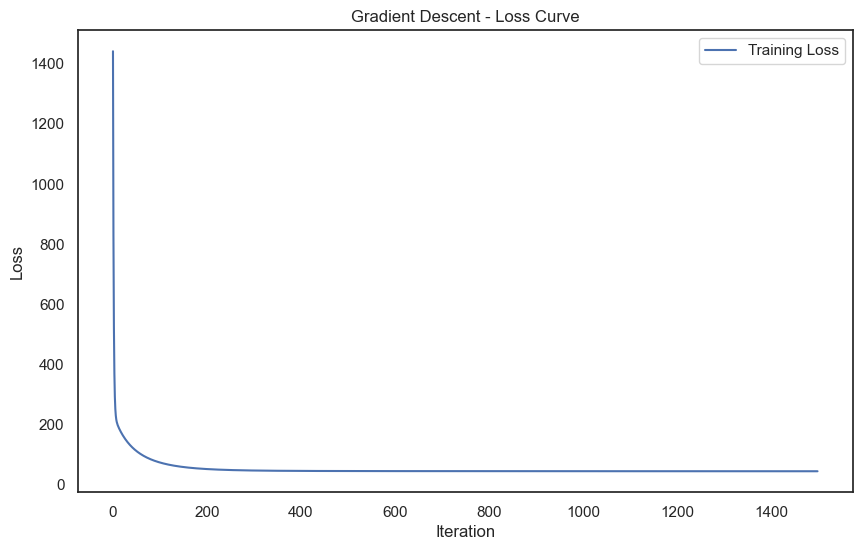

In [232]:
# In the plot we plotted we can see the loss is reducing gradually and luckyly we have 
# validiation loss less than training loss
plt.figure(figsize=(10, 6))
plt.plot(loss_curve, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent - Loss Curve')
plt.legend()
plt.show()

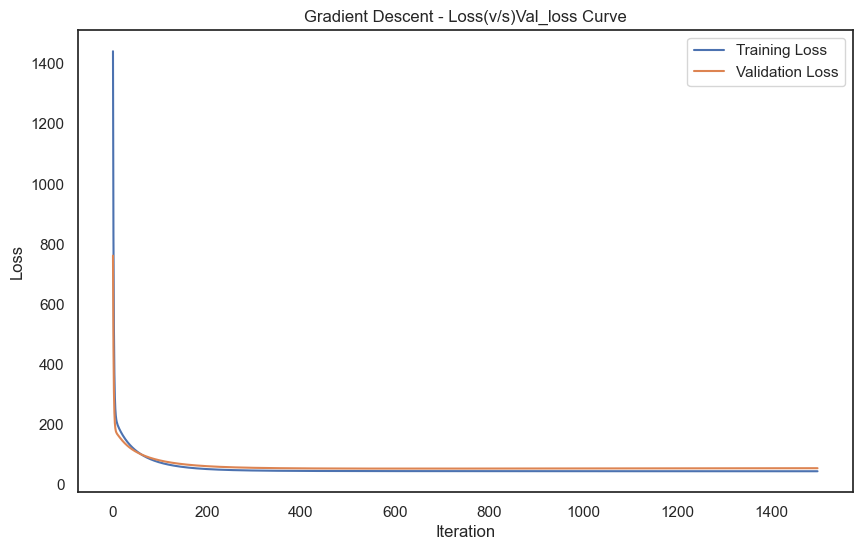

In [233]:
# In the plot we plotted we can see the loss is reducing gradually and luckyly we have 
# validiation loss less than training loss
plt.figure(figsize=(10, 6))
plt.plot(loss_curve, label='Training Loss')
plt.plot(validation_curve, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent - Loss(v/s)Val_loss Curve')
plt.legend()
plt.show()

# Part 5
# KNN[20 marks]

In [234]:
# from neighbours we import the KNeighbourRegressor
from sklearn import neighbors
#The loss function i choose is Mean Squared Error
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)
scaler = MinMaxScaler()

x_traink, x_valk, y_traink, y_valk = train_test_split(Data_new_fe, Data_new_pr, test_size=0.2, random_state=42)

x_traink = scaler.fit_transform(x_traink)
x_valk = scaler.fit_transform(x_valk)

Prediction = None 
optimum_k = None
k_range = range(1,21)
Best_validation_error = np.inf
Val_err = []
for k in k_range:
    k+=1
    Model = neighbors.KNeighborsRegressor(n_neighbors = k)
    Model.fit(x_traink, y_traink)
    y_predk = Model.predict(x_valk)
    
    mse = mean_squared_error(y_valk, y_predk)
    Val_err.append(mse)
    if mse <= Best_validation_error :
        Best_validation_error = mse
        optimum_k = k
        Prediction = y_predk
    print(f"k : {k},mse : {mse},best_mse : {Best_validation_error}")
print(f"best_k : {optimum_k},best_mse : {Best_validation_error}")

k : 2,mse : 54.5096380794702,best_mse : 54.5096380794702
k : 3,mse : 49.20197041942605,best_mse : 49.20197041942605
k : 4,mse : 48.58995571192054,best_mse : 48.58995571192054
k : 5,mse : 44.35857925827814,best_mse : 44.35857925827814
k : 6,mse : 43.75814464679912,best_mse : 43.75814464679912
k : 7,mse : 45.91751535342614,best_mse : 43.75814464679912
k : 8,mse : 45.77825837127484,best_mse : 43.75814464679912
k : 9,mse : 45.98832961327774,best_mse : 43.75814464679912
k : 10,mse : 46.77396562913907,best_mse : 43.75814464679912
k : 11,mse : 48.822507240982965,best_mse : 43.75814464679912
k : 12,mse : 51.62220206493744,best_mse : 43.75814464679912
k : 13,mse : 54.10088773462909,best_mse : 43.75814464679912
k : 14,mse : 56.983962329368815,best_mse : 43.75814464679912
k : 15,mse : 58.98940146578366,best_mse : 43.75814464679912
k : 16,mse : 59.73353602028146,best_mse : 43.75814464679912
k : 17,mse : 59.46547344118792,best_mse : 43.75814464679912
k : 18,mse : 60.335184567901244,best_mse : 43.75

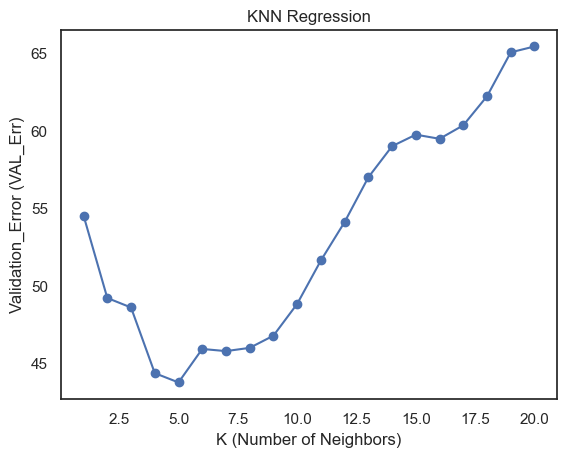

In [235]:
plt.plot(k_range, Val_err, marker='o')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Validation_Error (VAL_Err)')
plt.title('KNN Regression')
plt.show()

Best K is K: 6 , MSE at that value is : 51.021255794701986

# Part 7
# Generalised Linear Models [30 marks]

Poission is good for time series data and Gaussian is good for real valued data.

In [236]:
#GLM1 I used Poisson 
x_trainGLM, x_valGLM, y_trainGLM, y_valGLM = train_test_split(Data_new_fe, Data_new_pr, test_size=0.2, random_state=42)
features_with_constant = sm.add_constant(x_trainGLM)
features_with_constant_val = sm.add_constant(x_valGLM)
poisson_model = sm.GLM(y_trainGLM, features_with_constant, family=sm.families.Poisson(link=sm.families.links.log())).fit()
y_pred = poisson_model.predict(features_with_constant_val)
print("Poisson Regression Model Summary:")
print(poisson_model.summary())
print("R square :")
print(RS(y_pred,y_valGLM))
print("predicted values :")
print(y_pred[:5])

Poisson Regression Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:      Material Strength   No. Observations:                  604
Model:                            GLM   Df Residuals:                      593
Model Family:                 Poisson   Df Model:                           10
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.4
Date:                Sun, 03 Sep 2023   Deviance:                       820.58
Time:                        21:40:43   Pearson chi2:                     810.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9996
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

In [237]:
#GLM2 I used Gausian 
x_trainGLM, x_valGLM, y_trainGLM, y_valGLM = train_test_split(Data_new_fe, Data_new_pr, test_size=0.2, random_state=42)
features_with_constant = sm.add_constant(x_trainGLM)
features_with_constant_val = sm.add_constant(x_valGLM)
gaussian_model = sm.GLM(y_trainGLM, features_with_constant, family=sm.families.Gaussian()).fit()
y_pred = gaussian_model.predict(features_with_constant_val)
print("Gaussian Regression Model Summary:")
print(gaussian_model.summary())
print("R square :")
print(RS(y_pred,y_valGLM))
print("predicted values :")
print(y_pred[:5])

Gaussian Regression Model Summary:
                 Generalized Linear Model Regression Results                  
Dep. Variable:      Material Strength   No. Observations:                  604
Model:                            GLM   Df Residuals:                      593
Model Family:                Gaussian   Df Model:                           10
Link Function:               identity   Scale:                          43.972
Method:                          IRLS   Log-Likelihood:                -1994.1
Date:                Sun, 03 Sep 2023   Deviance:                       26075.
Time:                        21:40:43   Pearson chi2:                 2.61e+04
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9984
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

# part 8
# test output [30 marks]

In [238]:
# for linear regression
test_pred = lin_reg.predict(testx_)
print('The Mean Square Error(MSE) or J(theta) is: ',mean_squared_error(test_pred,testy_))
print('R square obtain for scikit learn library is :',RS(test_pred,testy_))

The Mean Square Error(MSE) or J(theta) is:  37.82388721463983
R square obtain for scikit learn library is : 0.8414601077471401


In [239]:
# for Random Forest
test_pred = rf_reg.predict(testx_)
print('The Mean Square Error(MSE) or J(theta) is: ',mean_squared_error(test_pred,testy_))
print('R square obtain for scikit learn library is :',RS(test_pred,testy_))

The Mean Square Error(MSE) or J(theta) is:  20.42639600556399
R square obtain for scikit learn library is : 0.9143821838443159


In [240]:
# for decision tree 
test_pred = dtr.predict(testx_)
print('The Mean Square Error(MSE) or J(theta) is: ',mean_squared_error(test_pred,testy_))
print('R square obtain for scikit learn library is :',RS(test_pred,testy_))

The Mean Square Error(MSE) or J(theta) is:  30.79839950331126
R square obtain for scikit learn library is : 0.8709076380461073


#for Gradient Decent we have the MSE = 54.883813284647616

#for KNN we have the MSE = 51.021255794701986 for the value K = 6

#for GLM1 : poisson we get the R square value : 0.7753965472202718

#for GLM1 : poisson we get the R square value : 0.8085000034274505

In [252]:
print(MaterialStrength_testing[:5])

   total_binders_content_sqrt   age_log  cement  superplasticizer  \
0                   15.874508  2.079442   252.0               0.0   
1                   15.874508  3.367296   252.0               0.0   
2                   18.411953  3.367296   339.0               0.0   
3                   19.824228  1.386294   393.0               0.0   
4                   19.824228  3.367296   393.0               0.0   

   total_solid_content_sqr  blast_furnace_slag_log  fine_aggregate _log  \
0                4609609.0                     0.0             6.665684   
1                4609609.0                     0.0             6.665684   
2                4635409.0                     0.0             6.626718   
3                4372281.0                     0.0             6.632002   
4                4372281.0                     0.0             6.632002   

   coarse_aggregate_log  water_log  aggregate_content_sqr  
0              7.013915   5.225747              3591025.0  
1             

In [254]:
MaterialStrength_testing_1 = np.c_[np.ones(MaterialStrength_testing.shape[0]),MaterialStrength_testing]
print(MaterialStrength_testing_1.shape)
final_prediction_lin_rg = lin_reg.predict(MaterialStrength_testing_1)

(230, 11)


In [255]:
print(final_prediction_lin_rg)

[ 9.43900694 22.09937309 32.15677543 17.01331014 36.48772131 47.72962576
 24.15699752 36.81736367  9.26732436 22.09937309 14.52159211 27.18195826
 38.42386271 45.18374457 51.97059569 30.78671762 37.60076264 43.78035598
 50.26112879 61.50303324 72.23075501 20.93649636 27.41726916 45.41905547
 25.18309805 38.43686852 25.82647218 44.85116066 57.51152681 38.20869993
 44.9836138  29.73723786 27.65951283 46.09923484 58.24374039 34.68629861
 37.13356828 37.84593174 41.20680516 31.6862609  47.71753009 37.09968703
 32.91788141 39.47107035 43.68772924 43.80444022 49.2781617  47.3468845
 36.57775212 29.61449872 37.63131563 36.76649254 36.02092465 34.90842297
 45.38064331 49.08010181 42.85028245 39.5510651  45.69175722 31.13937384
 43.22453196 42.21560599 25.45026446 40.77899827 34.04264075 38.61458513
 41.04361842 38.2564711  44.93926728 37.47679855 31.88450616 34.5576577
 37.74927556 25.75205983 41.3163861  30.47346515 26.25334145 30.82663319
 26.96415146 44.70862305 23.37388387 37.15482523 29.7

In [257]:
Results = pd.DataFrame(final_prediction_lin_rg)
Results.to_csv("12140630_Nikhil_Ass1.csv") 